In [116]:
import numpy as np
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer, LinearLayer, SigmoidLayer, SoftmaxLayer
from pybrain.datasets import SupervisedDataSet, ClassificationDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure import FullConnection
from pybrain.structure import FeedForwardNetwork
from pybrain.tools.validation import ModuleValidator
from pybrain.utilities import percentError
from pybrain.datasets import SupervisedDataSet

In [11]:
def build_my_net(i,h,o):
    net = buildNetwork(i,h,o,hiddenclass=TanhLayer, outclass=LinearLayer)
    return net    

In [3]:
train_data = SupervisedDataSet(1, 1)

In [4]:
train_points = np.random.uniform(-3,2,2000)
for point in train_points:
    train_data.addSample(point, point**3)

In [5]:
len(train_data)

2000

In [6]:
test_data_first = SupervisedDataSet(1, 1)
test_data_second = SupervisedDataSet(1, 1)

In [7]:
train_points_first = np.random.uniform(-3,2,1000)
for point in train_points_first:
    test_data_first.addSample(point, point**3)

In [8]:
train_points_second = np.random.uniform(-3,3,1000)
for point in train_points_second:
    test_data_second.addSample(point, point**3)

In [9]:
print len(test_data_first)
print len(test_data_second)

1000
1000


In [12]:
network = build_my_net(1,10,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(10)
ModuleValidator.MSE(network, test_data_first)

0.04363941627624815

In [13]:
first_mse = list()
second_mse = list()
for ten in range(10,110,10):
    network = build_my_net(1,ten,1)
    trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
    trainer.trainEpochs(100)
    first_mse.append(ModuleValidator.MSE(network, test_data_first))
    second_mse.append(ModuleValidator.MSE(network, test_data_second))
    print ten

10
20
30
40
50
60
70
80
90
100


In [14]:
first_temp = list()
second_temp = list()
network = build_my_net(1,1,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
first_temp.append(ModuleValidator.MSE(network, test_data_first))
second_temp.append(ModuleValidator.MSE(network, test_data_second))
print 1

1


In [15]:
first_result_mse = list()
second_result_mse = list()
first_result_mse.append(first_temp[0])
second_result_mse.append(second_temp[0])
for first in first_mse:
    first_result_mse.append(first)
for second in second_mse:
    second_result_mse.append(second)

In [16]:
second_result_mse

[58.276985366058568,
 4.4278502931570207,
 2.2751335593409818,
 3.3672155535503081,
 1.8505352441697618,
 2.3800749197638607,
 2.2404995178498788,
 2.3594463181296312,
 1.8073401043080382,
 2.052567211097001,
 2.4621065480594551]

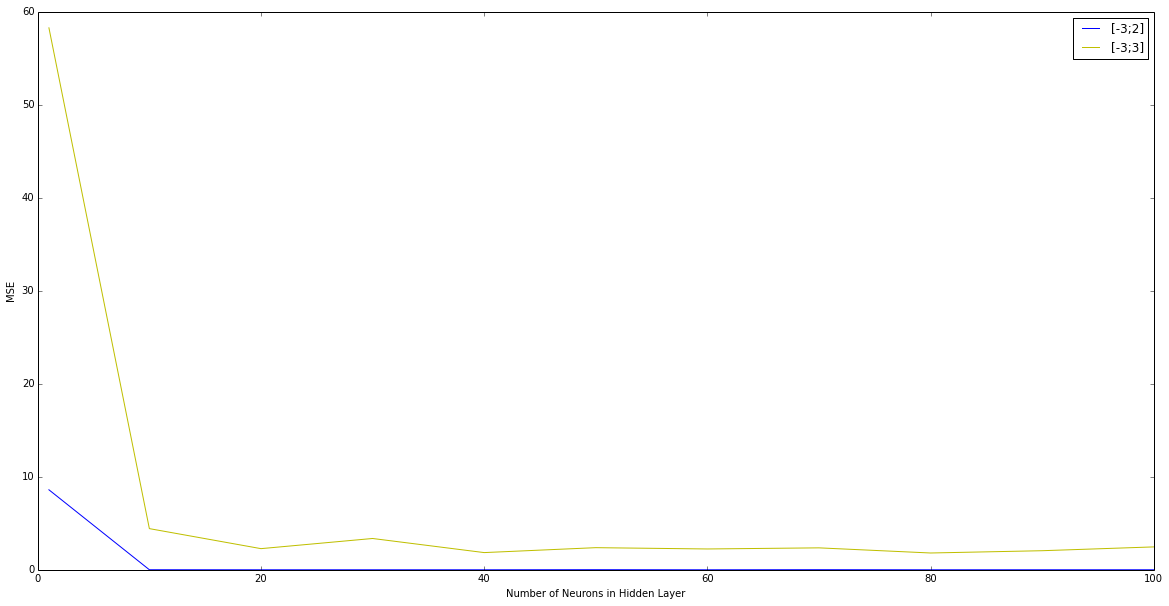

In [18]:
l = pylab.figure(figsize=(20, 10))
pylab.plot((1,10,20,30,40,50,60,70,80,90,100),first_result_mse, c = 'b', label = '[-3;2]')
pylab.plot((1,10,20,30,40,50,60,70,80,90,100),second_result_mse, c = 'y', label = '[-3;3]')
pylab.xlabel('Number of Neurons in Hidden Layer')
pylab.ylabel('MSE')
pylab.legend(loc='best')

The minimum number of neurons, which is enough for approximating is 10. At this number of neurons, MSE is already quite low, and further increasing gives just a slight benefit.

MSE on test set [-3,2] is always lower than MSE on [-3,3]. And it is expected, since we trained our network on [-3,2]. 

In [19]:
x_s = list()
y_s = list()
for p in np.arange(-3,3.1,0.1):
    x_s.append(p)
    y_s.append(p**3)
    
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
    

In [20]:
network.activate([2])

array([ 0.24359155])

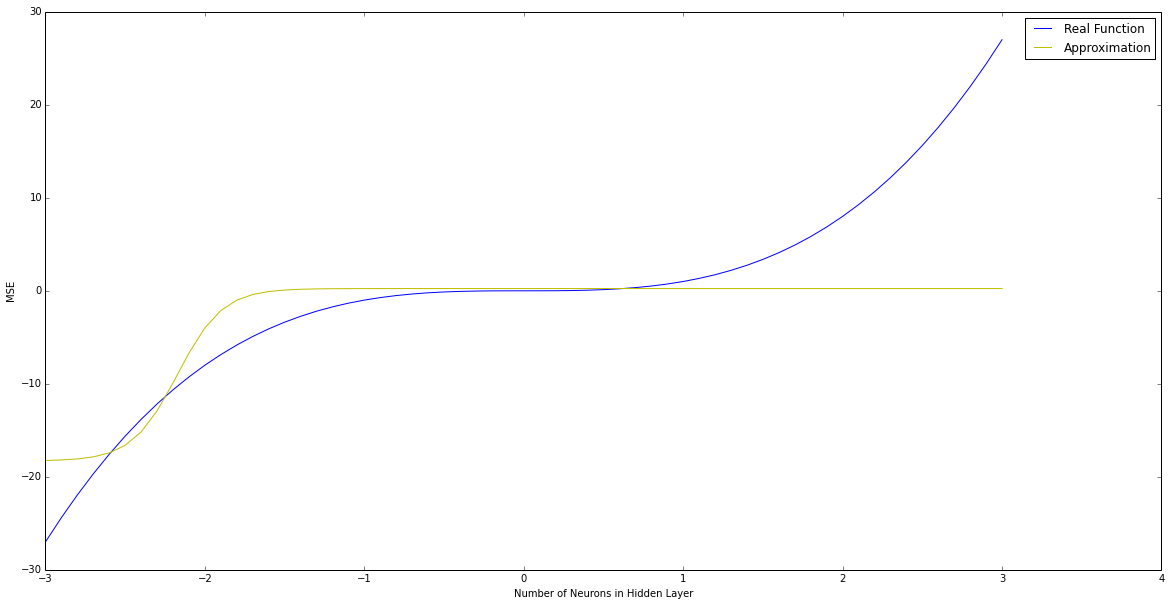

In [21]:
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = 'Approximation')
pylab.xlabel('Number of Neurons in Hidden Layer')
pylab.ylabel('MSE')
pylab.legend(loc='best')
pylab.show()

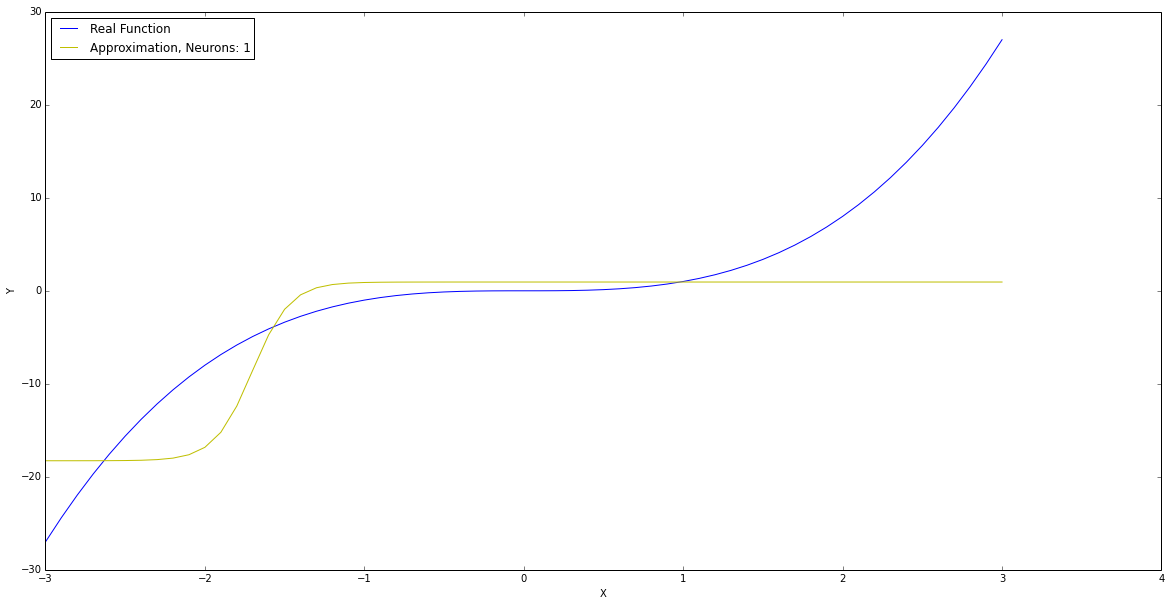

In [22]:
network = build_my_net(1,1,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(1)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

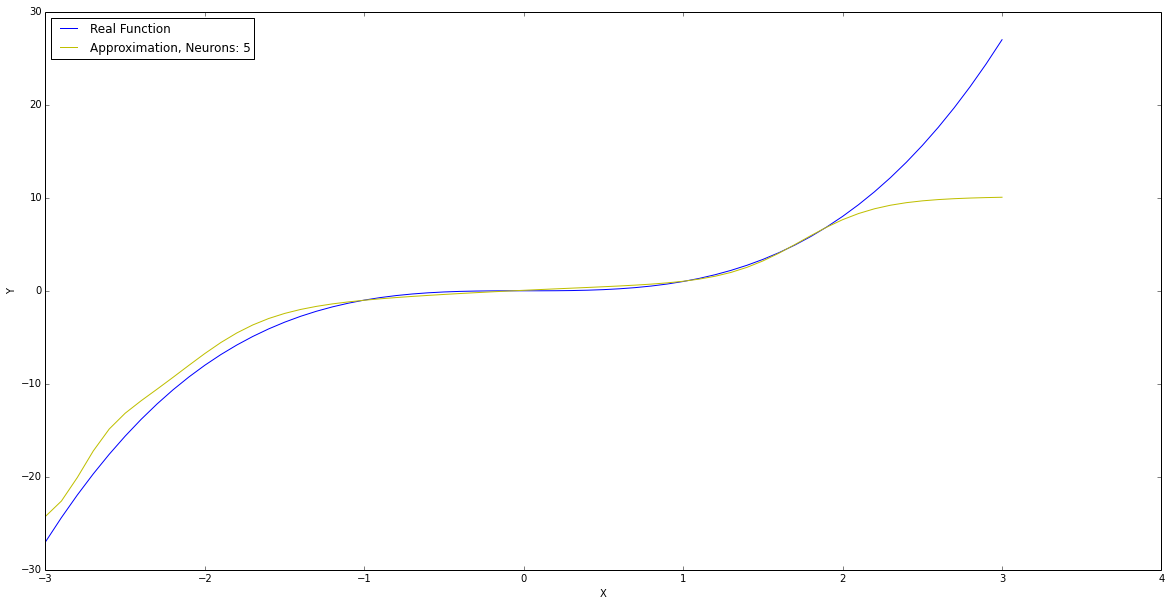

In [23]:
network = build_my_net(1,5,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(5)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

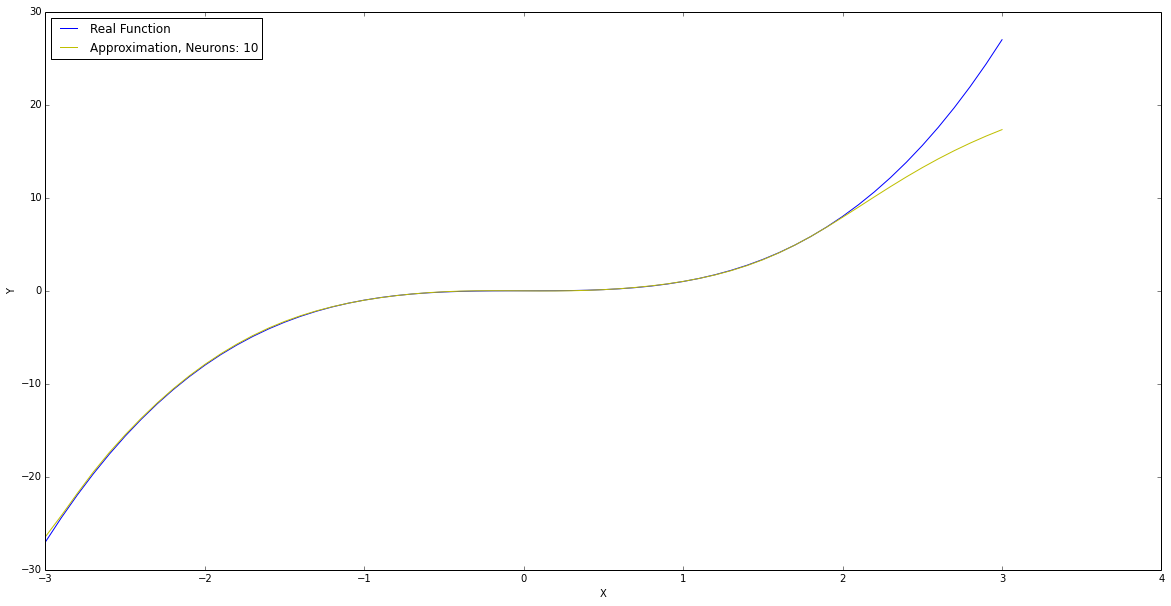

In [24]:
network = build_my_net(1,10,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(10)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

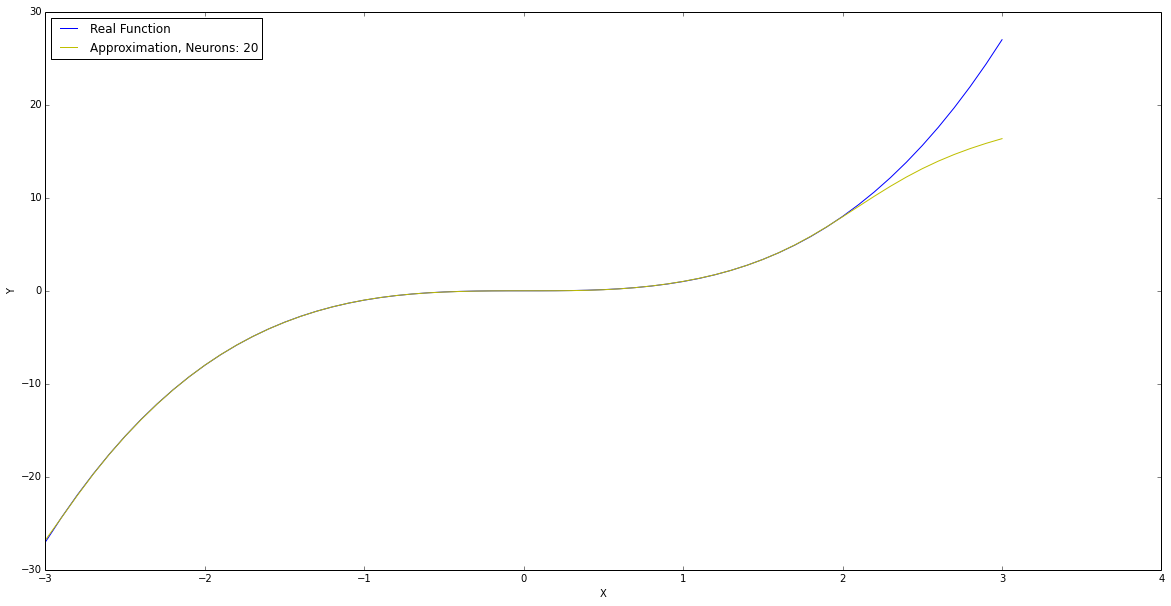

In [25]:
network = build_my_net(1,20,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(20)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

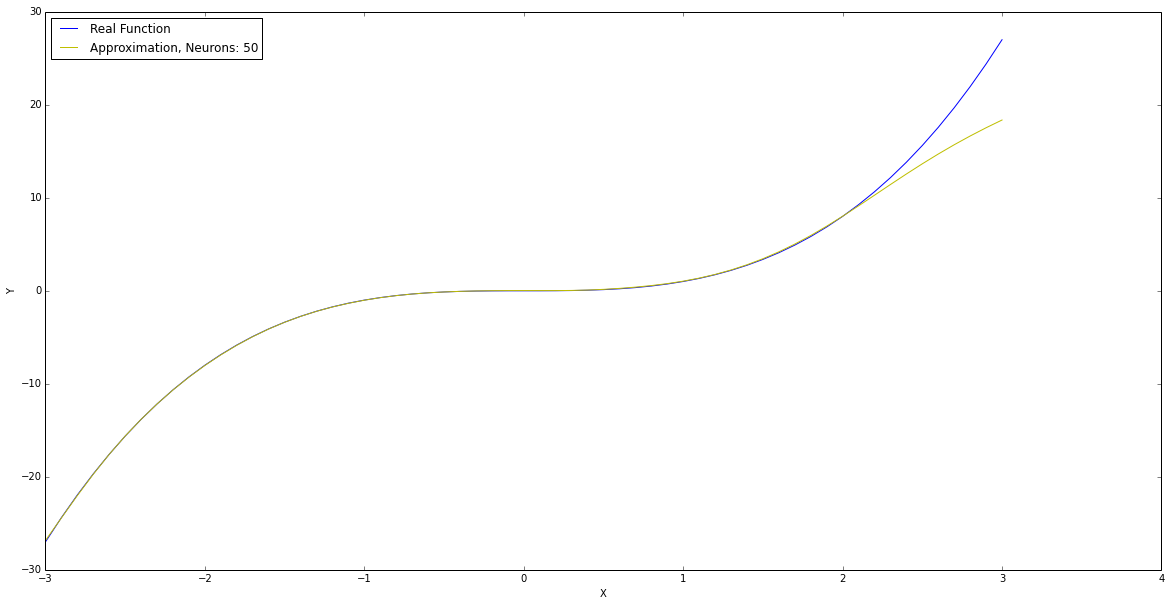

In [26]:
network = build_my_net(1,50,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(50)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

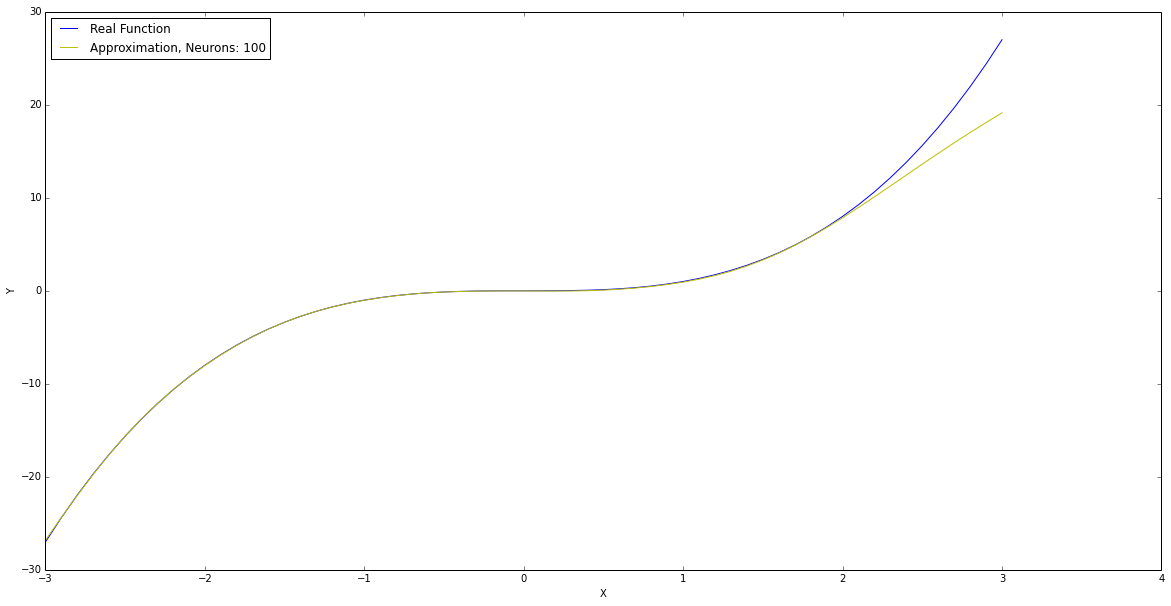

In [27]:
network = build_my_net(1,100,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(100)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

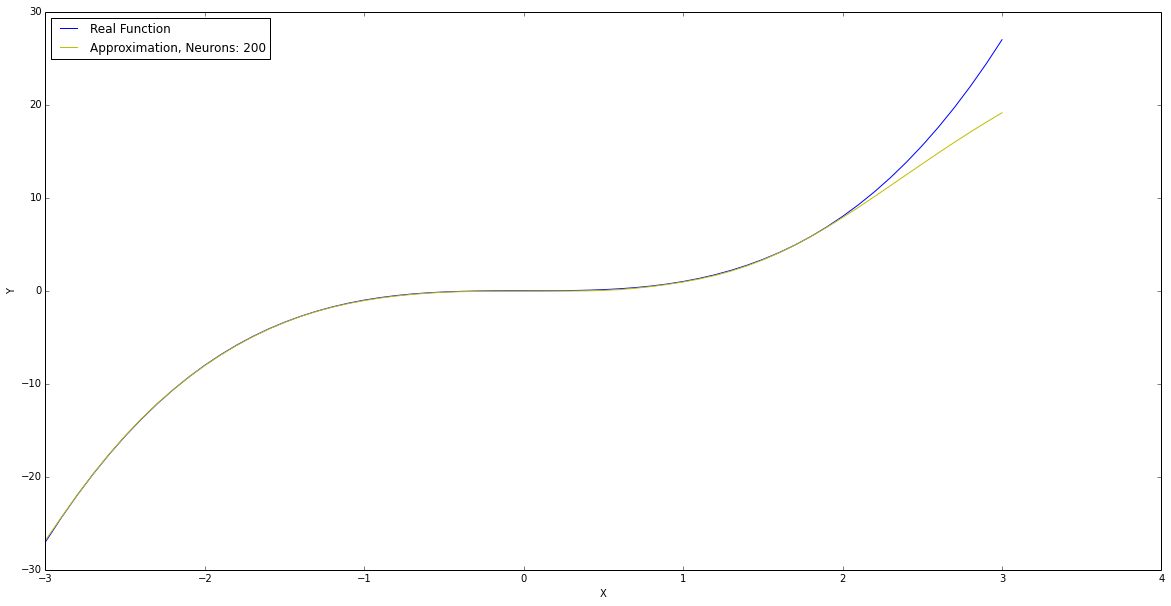

In [28]:
network = build_my_net(1,200,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(200)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

In [29]:
train_data = SupervisedDataSet(1,1)

In [30]:
train_points_first = np.random.uniform(-3,1,1600)
train_points_second = np.random.uniform(2,3,400)
from random import shuffle
train_points = np.concatenate((train_points_first,train_points_second))
shuffle(train_points)
for point in train_points:
    train_data.addSample(point, point**3)

In [31]:
first_mse = list()
second_mse = list()
for ten in range(10,110,10):
    network = build_my_net(1,ten,1)
    trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
    trainer.trainEpochs(100)
    first_mse.append(ModuleValidator.MSE(network, test_data_first))
    second_mse.append(ModuleValidator.MSE(network, test_data_second))
    print ten

10
20
30
40
50
60
70
80
90
100


In [32]:
first_temp = list()
second_temp = list()
network = build_my_net(1,1,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
first_temp.append(ModuleValidator.MSE(network, test_data_first))
second_temp.append(ModuleValidator.MSE(network, test_data_second))
print 1

1


In [33]:
first_result_mse = list()
second_result_mse = list()
first_result_mse.append(first_temp[0])
second_result_mse.append(second_temp[0])
for first in first_mse:
    first_result_mse.append(first)
for second in second_mse:
    second_result_mse.append(second)

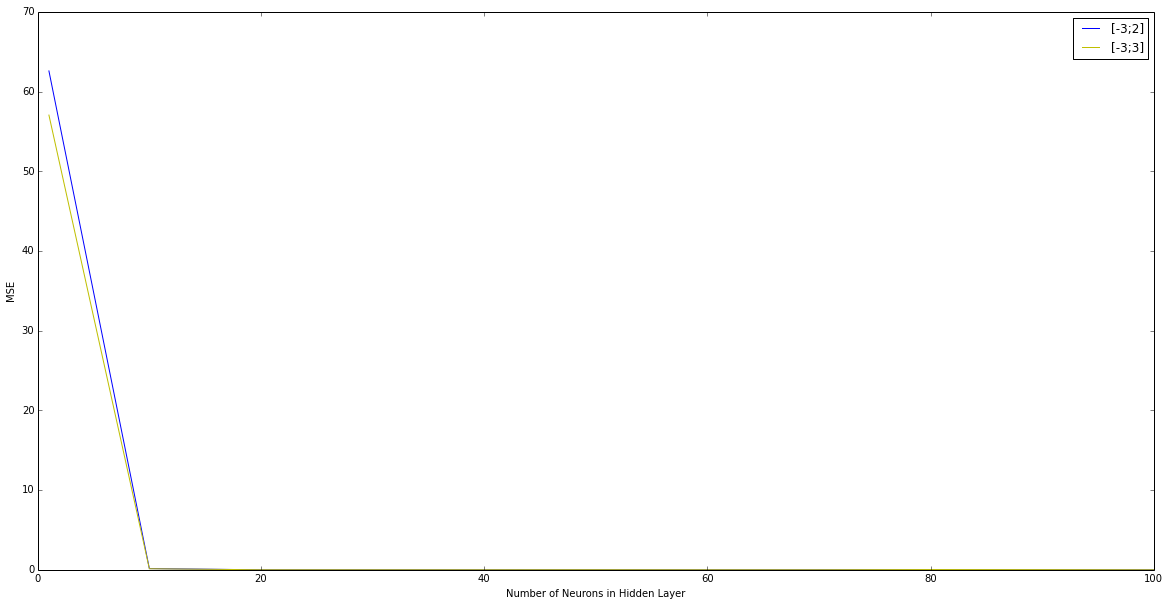

In [34]:
l = pylab.figure(figsize=(20, 10))
pylab.plot((1,10,20,30,40,50,60,70,80,90,100),first_result_mse, c = 'b', label = '[-3;2]')
pylab.plot((1,10,20,30,40,50,60,70,80,90,100),second_result_mse, c = 'y', label = '[-3;3]')
pylab.xlabel('Number of Neurons in Hidden Layer')
pylab.ylabel('MSE')
pylab.legend(loc='best')

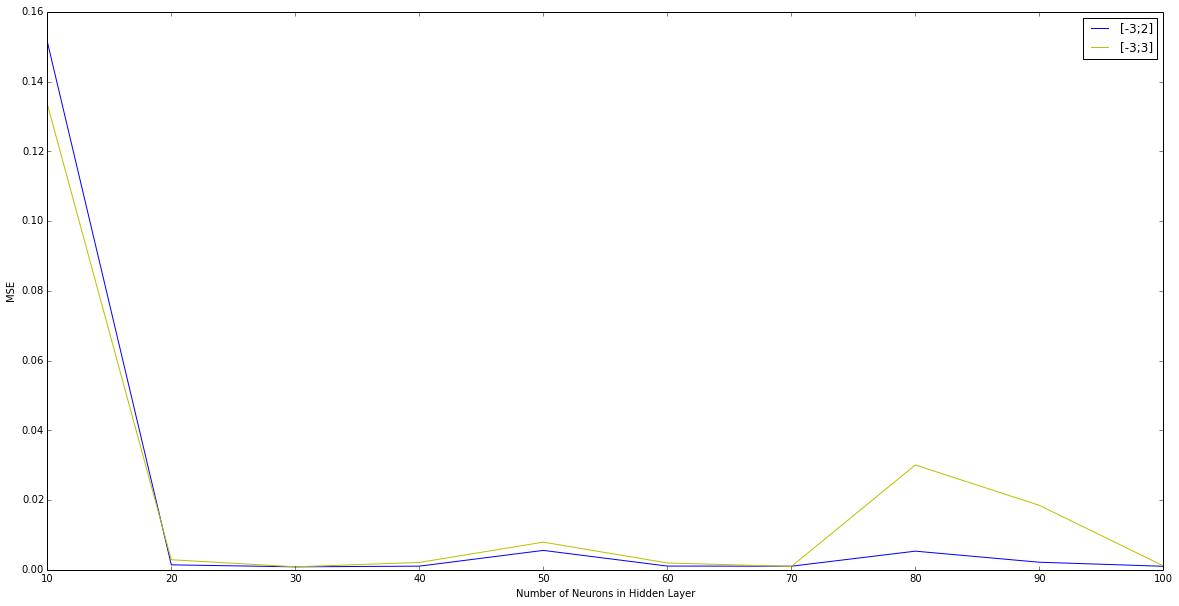

In [35]:
l = pylab.figure(figsize=(20, 10))
pylab.plot((10,20,30,40,50,60,70,80,90,100),first_mse, c = 'b', label = '[-3;2]')
pylab.plot((10,20,30,40,50,60,70,80,90,100),second_mse, c = 'y', label = '[-3;3]')
pylab.xlabel('Number of Neurons in Hidden Layer')
pylab.ylabel('MSE')
pylab.legend(loc='best')

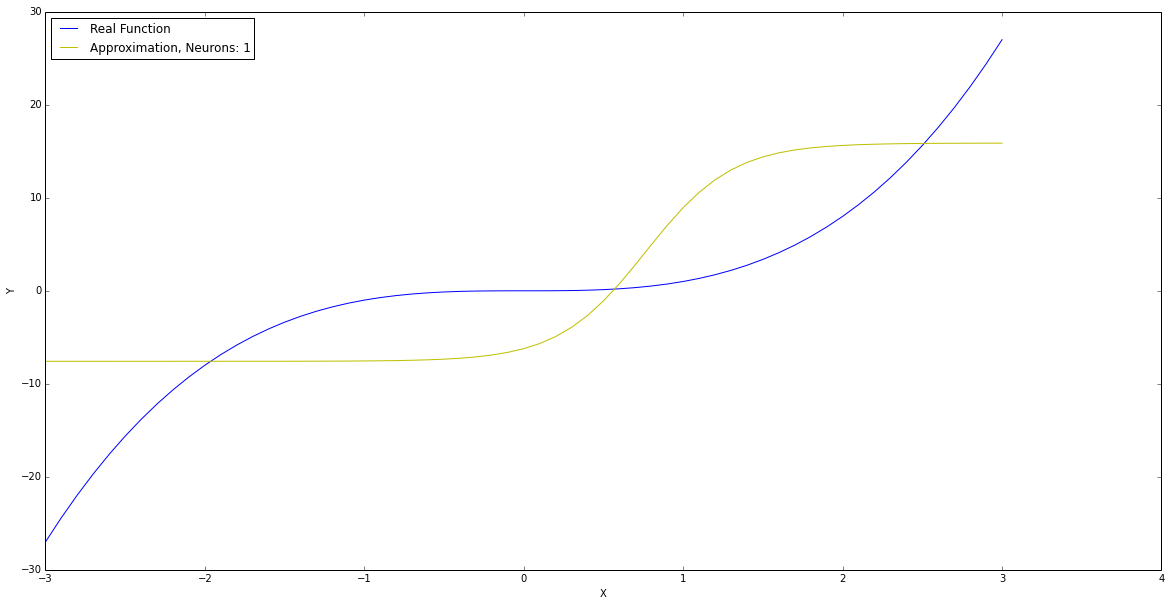

In [36]:
network = build_my_net(1,1,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(1)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

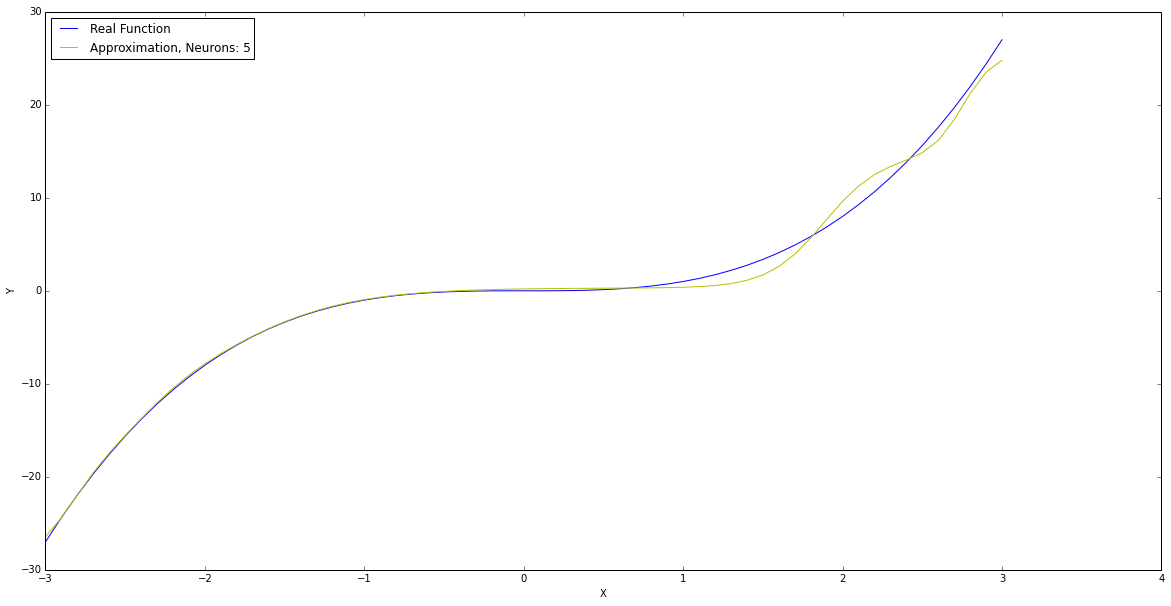

In [37]:
network = build_my_net(1,5,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(5)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

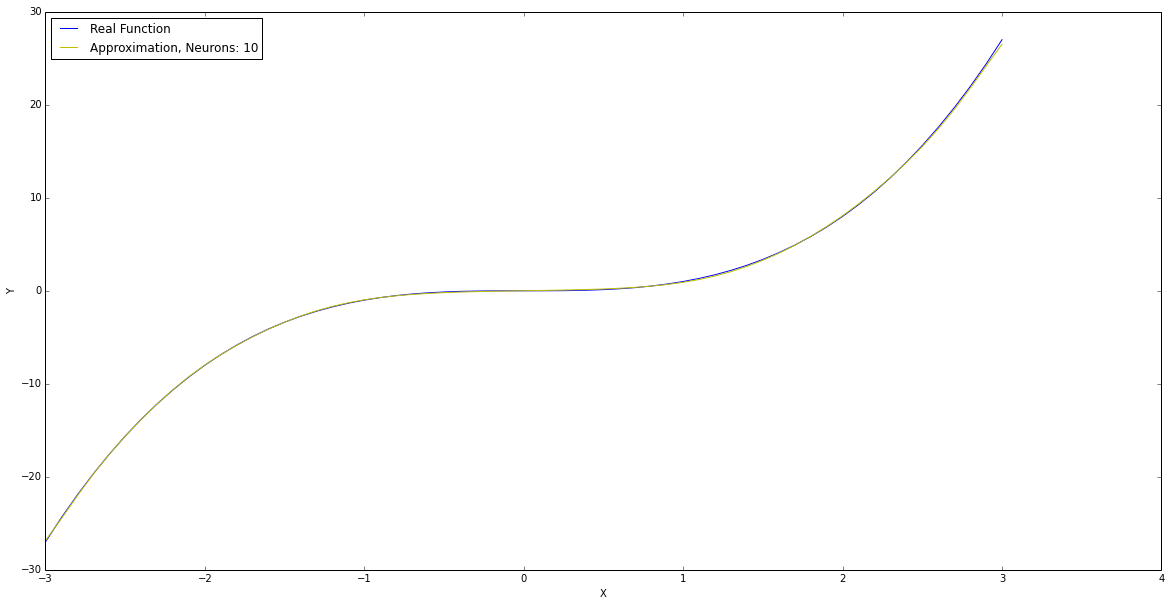

In [38]:
network = build_my_net(1,10,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(10)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

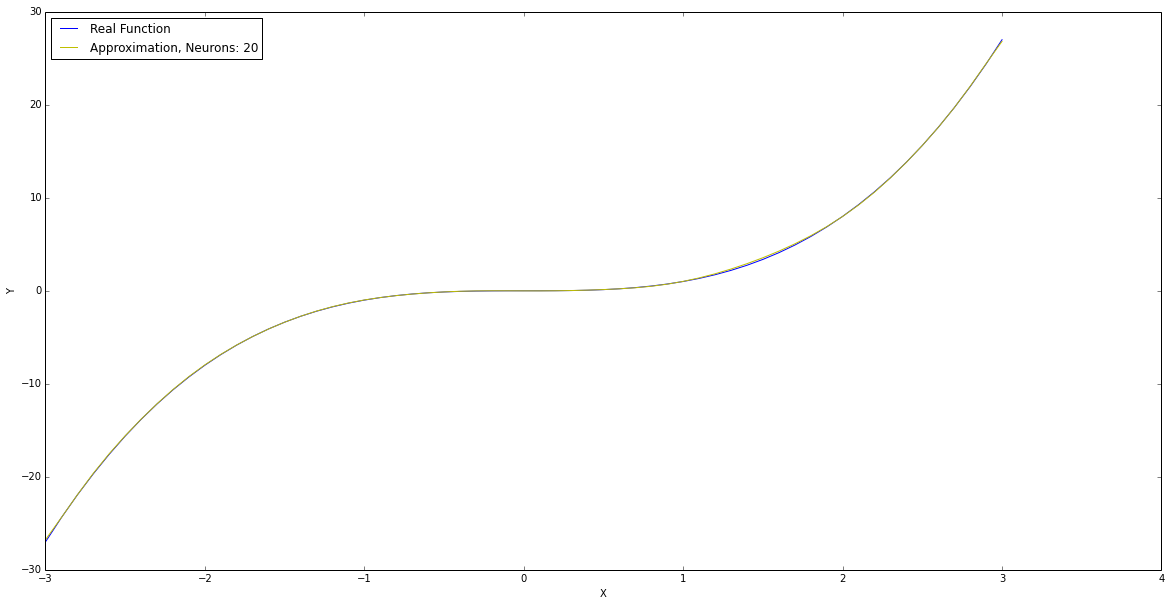

In [39]:
network = build_my_net(1,20,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(20)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

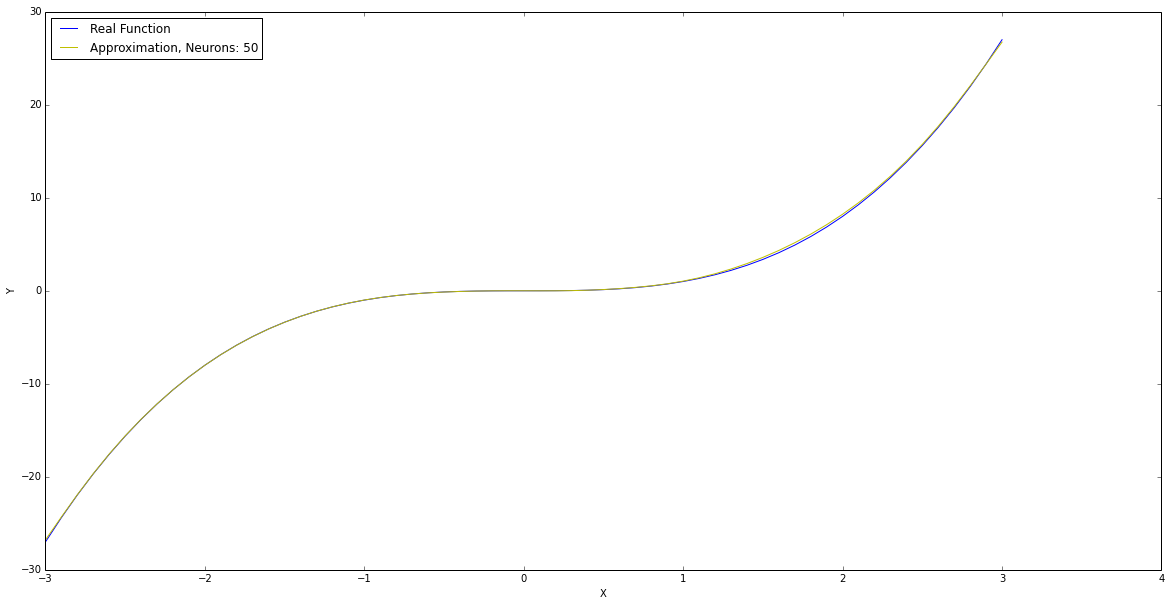

In [40]:
network = build_my_net(1,50,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(50)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

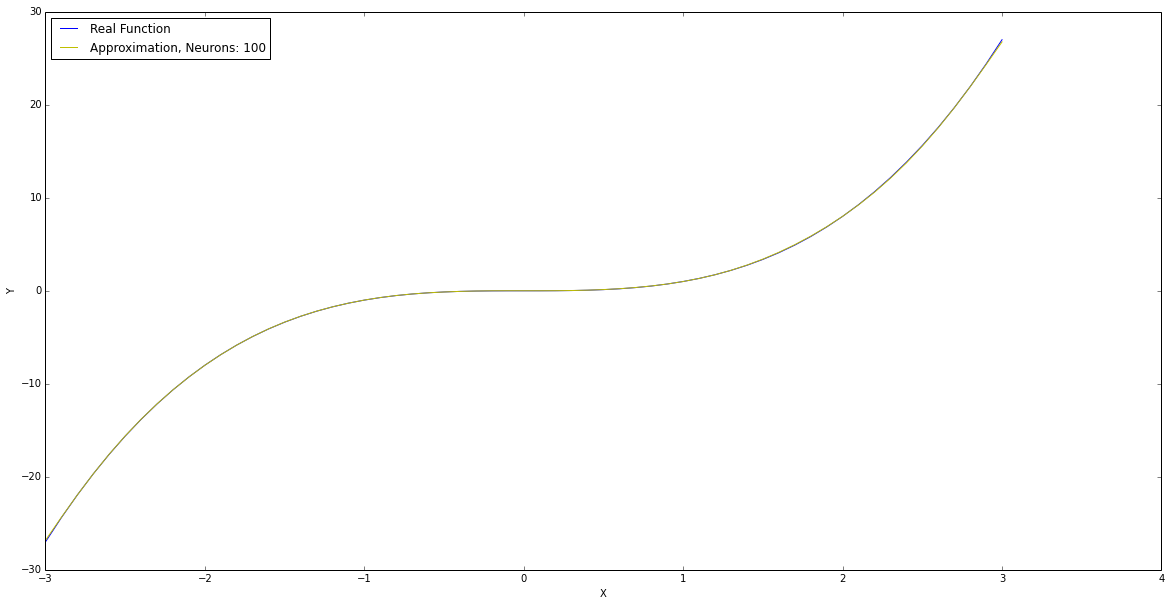

In [41]:
network = build_my_net(1,100,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(100)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

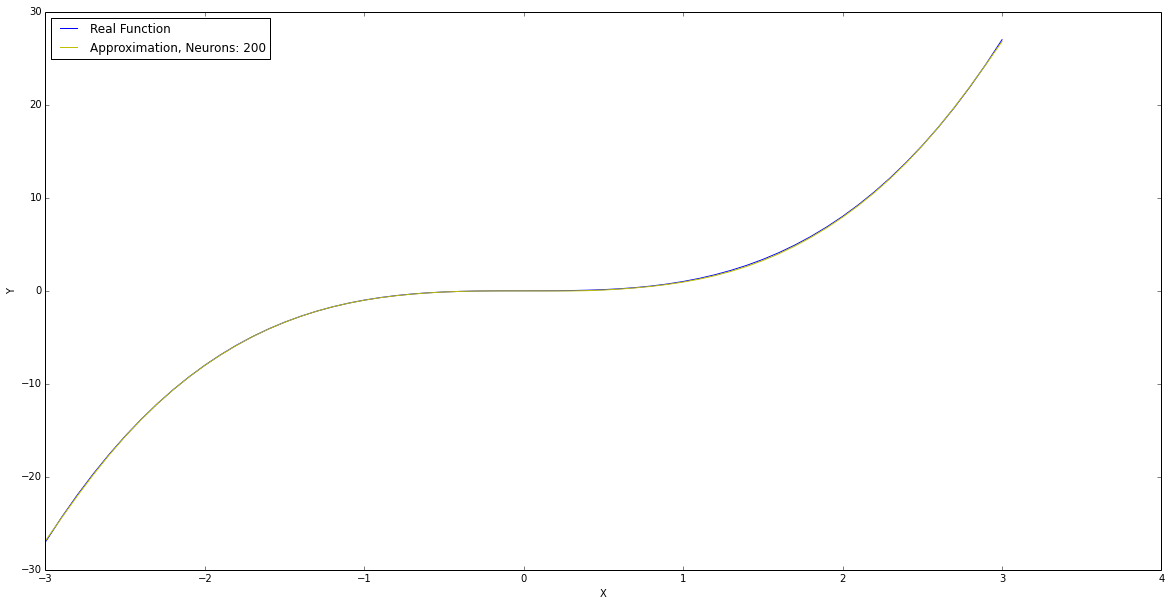

In [42]:
network = build_my_net(1,200,1)
trainer = BackpropTrainer(network, train_data, weightdecay=0.00001)
trainer.trainEpochs(100)
y_predicted = list()
for x in x_s:
    t = list()
    t.append(x)
    y_predicted.append(network.activate(np.array(t)))
l = pylab.figure(figsize=(20, 10))
pylab.plot(x_s,y_s, c = 'b', label = 'Real Function')
pylab.plot(x_s,y_predicted, c = 'y', label = str('Approximation, Neurons: ' + str(200)))
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.legend(loc='best')
pylab.show()

From the graphs it is obvious that the second model has better approximation quality. First model doesn't approximate properly on x > 2, but the second approximate good on these points and also on interval [1;2] despite the fact, that it is not trained on that interval.

In [44]:
mnist_train = np.loadtxt('mnist_train.csv', delimiter=',')
train_data = ClassificationDataSet(28*28, nb_classes=10)
for i in xrange(len(mnist_train)):
    train_data.appendLinked(mnist_train[i, 1:] / 255., int(mnist_train[i, 0]))
train_data._convertToOneOfMany()
mnist_test = np.loadtxt('mnist_test.csv', delimiter=',')
test_data = ClassificationDataSet(28*28, nb_classes=10)
for i in xrange(len(mnist_test)):
    test_data.appendLinked(mnist_test[i, 1:] / 255., int(mnist_test[i, 0]))
test_data._convertToOneOfMany()

In [56]:
net = buildNetwork(784,35,10,hiddenclass=SigmoidLayer, outclass=SoftmaxLayer)
net.modules

{<BiasUnit 'bias'>,
 <LinearLayer 'in'>,
 <SigmoidLayer 'hidden0'>,
 <SoftmaxLayer 'out'>}

In [57]:
trainer = BackpropTrainer(net, train_data, weightdecay=0.001)
trainer.trainEpochs(25)

In [55]:
train_data.outdim

10

In [58]:
len(net.params)

27835

In [62]:
def build_my_net(i,h,o):
    net = FeedForwardNetwork()
    inLayer = LinearLayer(i)
    hiddenLayer = SigmoidLayer(h)
    outLayer = SoftmaxLayer(o)
    net.addInputModule(inLayer)
    net.addModule(hiddenLayer)
    net.addOutputModule(outLayer)
    in_to_hidden = FullConnection(inLayer, hiddenLayer)
    hidden_to_out = FullConnection(hiddenLayer, outLayer)
    net.addConnection(in_to_hidden)
    net.addConnection(hidden_to_out)
    net.sortModules()
    return net

In [146]:
network = build_my_net(784,35,10)
network.modules

{<LinearLayer 'LinearLayer-406'>,
 <SigmoidLayer 'SigmoidLayer-410'>,
 <SoftmaxLayer 'SoftmaxLayer-411'>}

In [147]:
trainer = BackpropTrainer(network, train_data, weightdecay=0.001)
trainer.trainEpochs(25)

In [ ]:
len(network.params)

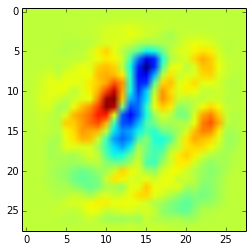

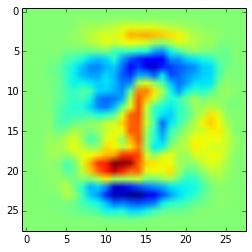

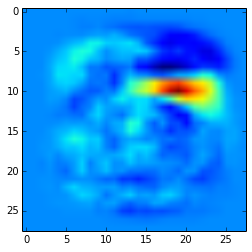

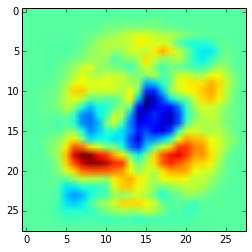

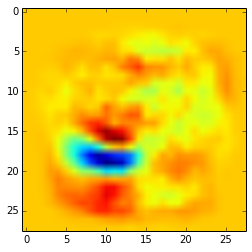

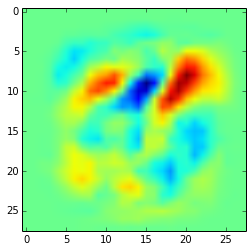

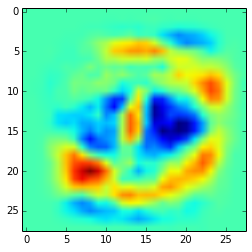

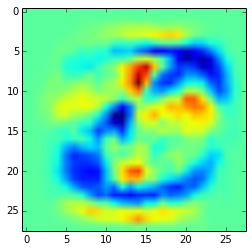

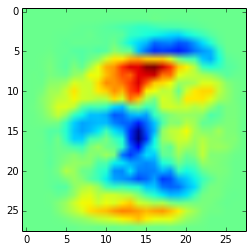

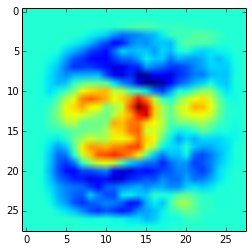

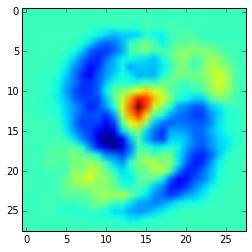

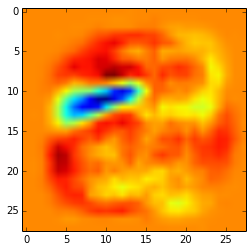

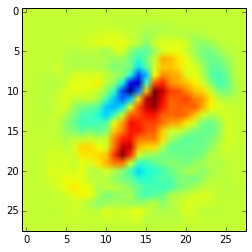

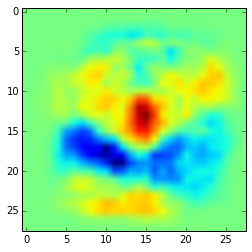

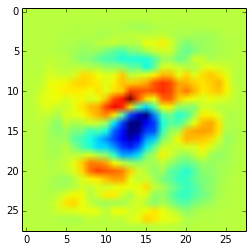

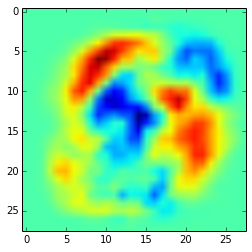

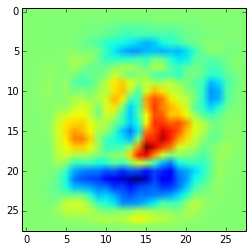

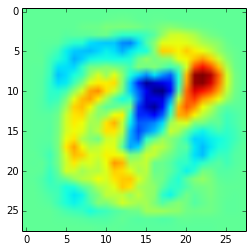

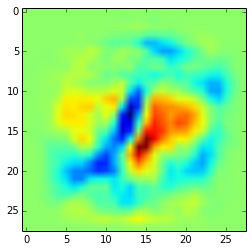

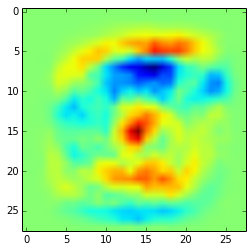

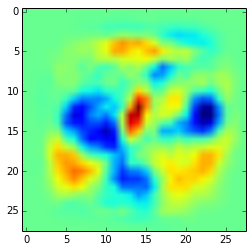

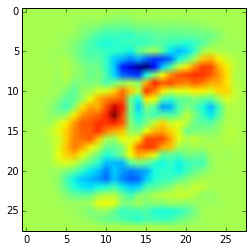

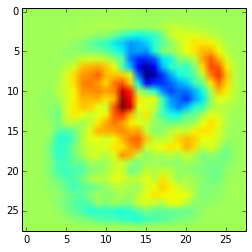

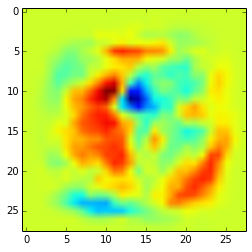

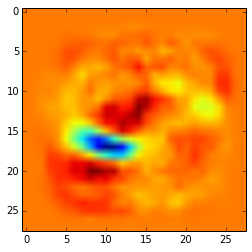

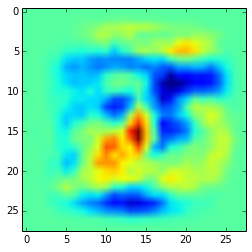

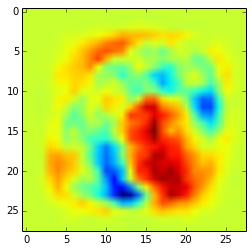

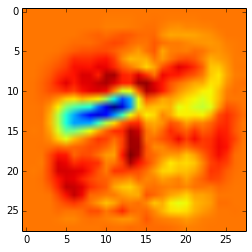

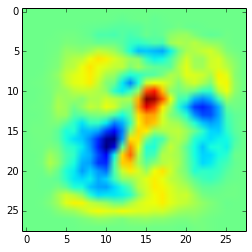

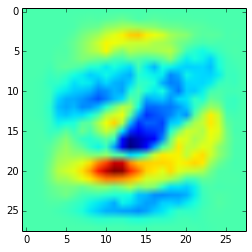

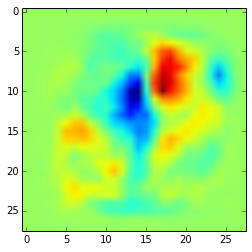

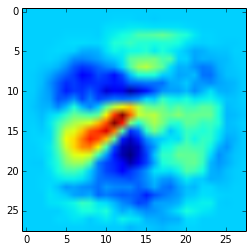

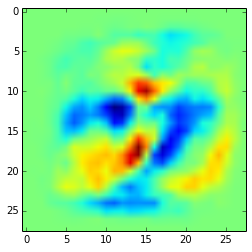

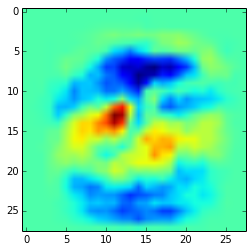

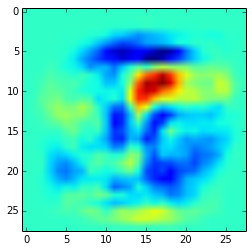

In [149]:
l = network.connections.keys()[0]
c = network.connections[l] 
neurons_weights = c[0].params.reshape((35,28,28))#.params.reshape((30, 28, 28)) 

for i in range(35): 
    plt.figure(i) 
    plt.imshow(neurons_weights[i])

At these pictures the most iportant features(in our case pixels) are highlited.

In [138]:
sigm = list(network.modules)[2]